<a href="https://colab.research.google.com/github/Jed-Restor/ELECTIVE2-MACHINE-LEARNING/blob/main/Review_of_Data_Exploration_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import libraries


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation


###Loading Data into DataFrame


In [62]:
df = pd.read_csv("Housing.csv")
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


###Dataset Data Types

In [24]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

###Dropping Irrelevant Features [airconditioning , hotwaterheating ]

In [25]:
df = df.drop(["airconditioning","hotwaterheating"], axis=1)
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

     parking prefarea furni

###Renaming the columns bedrooms to BR,  stories to STR, mainroad to MR


In [29]:
df = df.rename(columns= {"bedrooms":"BR", "stories":"STR", "mainroad":"MR"} )
df

,price,area,BR,bathrooms,STR,MR,guestroom,basement,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,0,no,furnished


###Dropping Duplicate rows

In [43]:
print("df shape: ", df.shape)

dupes = df[df.duplicated()]
print("no. of duplipcates: ",dupes.shape)

df = df.drop_duplicates()
print("df shape after dropping: ", df.shape)

df shape:  (545, 11)
no. of duplipcates:  (0, 11)
df shape after dropping:  (545, 11)


###Dropping missing values and showing how many values has been dropped

In [48]:
print(df.isnull().sum())
print("\nthere are no nullValues, therefore none are dropped")

price               0
area                0
BR                  0
bathrooms           0
STR                 0
MR                  0
guestroom           0
basement            0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

there are no nullValues, therefore none are dropped


###Detecting outliers and creating plots


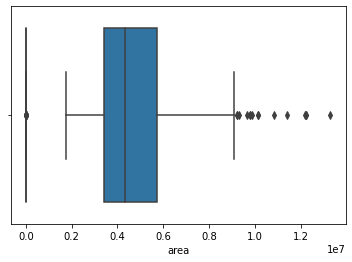

In [54]:
sns.boxplot(x=df['price'])

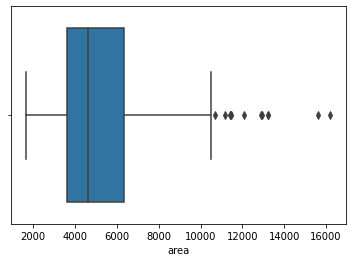

In [76]:
sns.boxplot(x=df['area'])

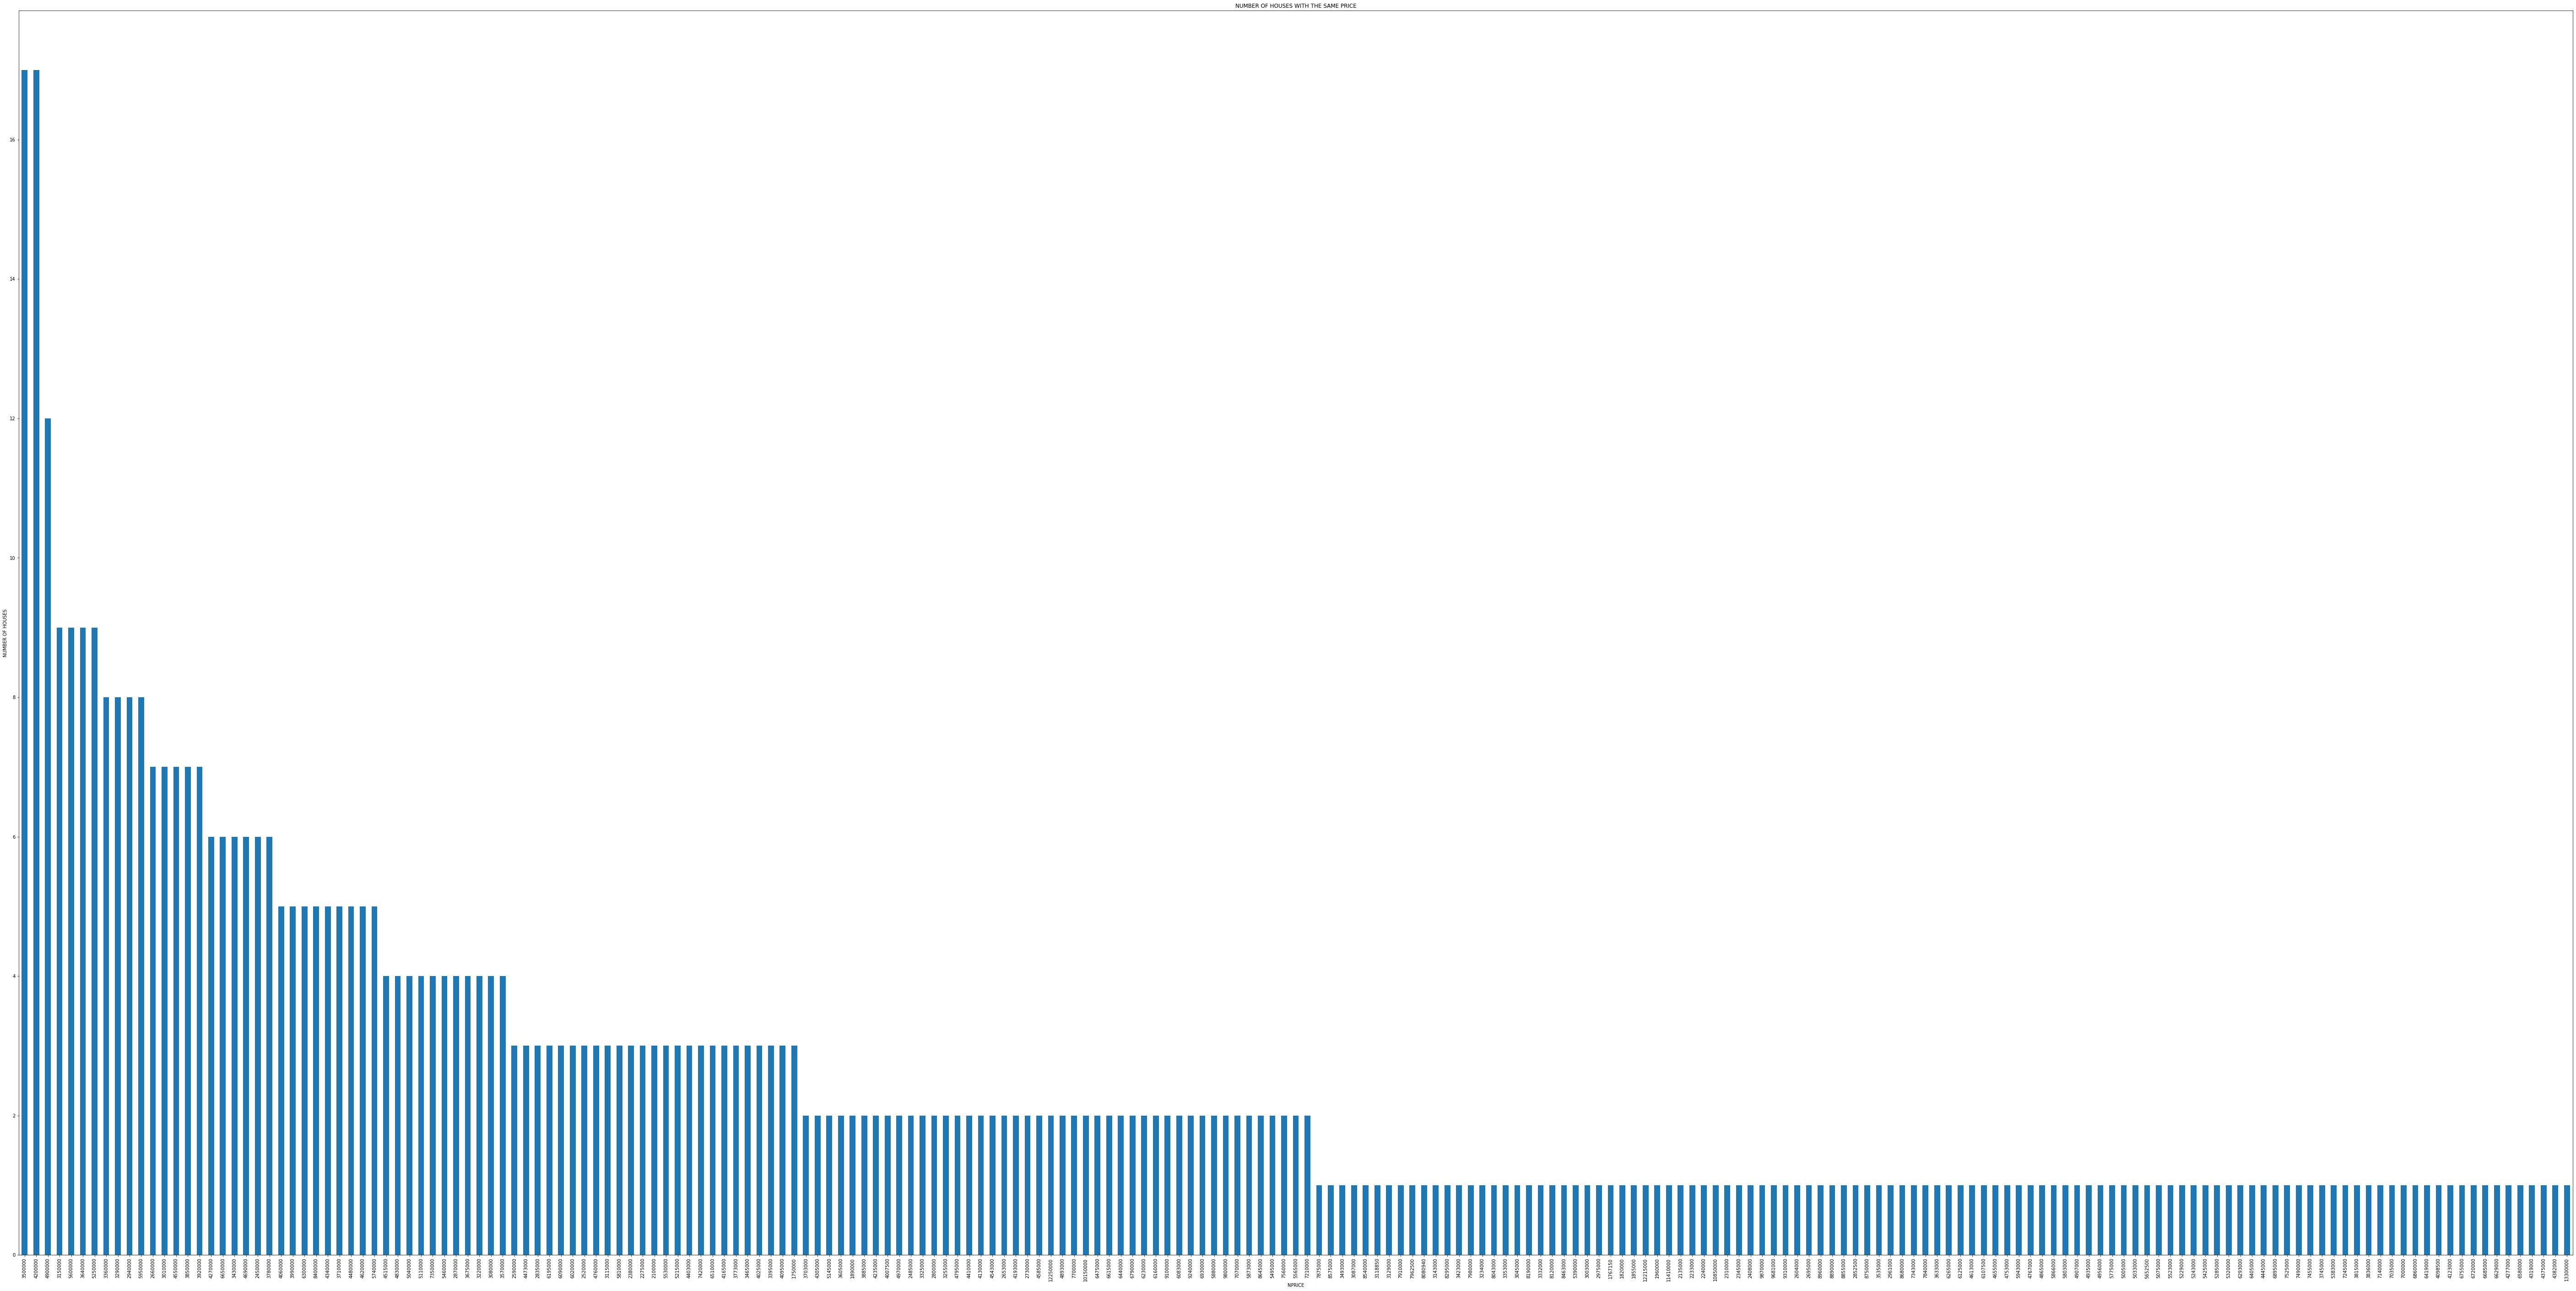

In [77]:
df.price.value_counts().plot(kind='bar', figsize=(100,50))
plt.title('NUMBER OF HOUSES WITH THE SAME PRICE')
plt.ylabel('NUMBER OF HOUSES')
plt.xlabel('NPRICE');

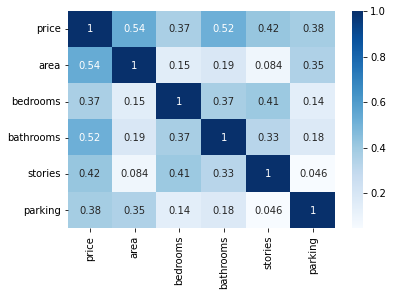

In [71]:
data= df.corr()
sns.heatmap(data,cmap="Blues",annot=True)

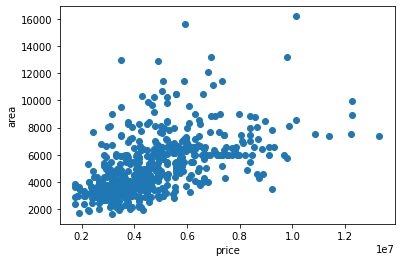

In [74]:
plt.scatter(df["price"], df["area"])
plt.xlabel("price")
plt.ylabel("area")
plt.show()